# Logistic Regression 3-class Classifier

The iris dataset is a classic and very easy multi-class classification dataset. If, surprisingly, you don’t know it yet, 
today you’re going to discover it with python. It was introduced by the British statistician and biologist Ronald Fisher in his 1936 
paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis".

This dataset is made of 150 observations of irises, a genus of flowering plants, each described by 4 numerical attributes:

- The sepal length in cm
- The sepal width in cm
- The petal length in cm
- The petal width in cm
- The species (target, in this case): Setosa, Versicolour, and Virginica

You can find more information about this dataset here: https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

## Exercise description

The goal of this exercise is to use a logistic-regression classifier to find decision boundaries 
(i.e., regions of the feature space) that separate the three classes of the iris dataset. 
We will be using only the first two dimensions (sepal length and width) of the iris dataset.

## Guided steps
### 1. Load the iris dataset

Use the `load_iris` function from `sklearn.datasets` to load the iris dataset, and store the features in a variable called `X` and the target in a variable called `y`. Then, keep only the first two features of the dataset (i.e., sepal length and width) and
separate the dataset into a training and a test set using the `train_test_split` function from `sklearn.model_selection`.

In [16]:
# Code goes here
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(as_frame=True, return_X_y=True)
X_two_features = X[["sepal length (cm)", "sepal width (cm)"]]
X_train, X_test, y_train, y_test = train_test_split(X_two_features, y, train_size=0.8)

### 2. Fit a logistic regression classifier

Create an instance of a Logistic Regression estimator and fit the data.
You can read more about the LogisticRegression class here: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [30]:
# Code goes here
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### 3. Plot the decision boundaries

Use the `DecisionBoundaryDisplay` class from `sklearn.inspection` to plot the decision boundaries of the classifier.
Plot also the training points and the test points, each with a different color.

C:\Users\MARIO\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'class_names'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


InvalidIndexError: (slice(None, None, None), 0)

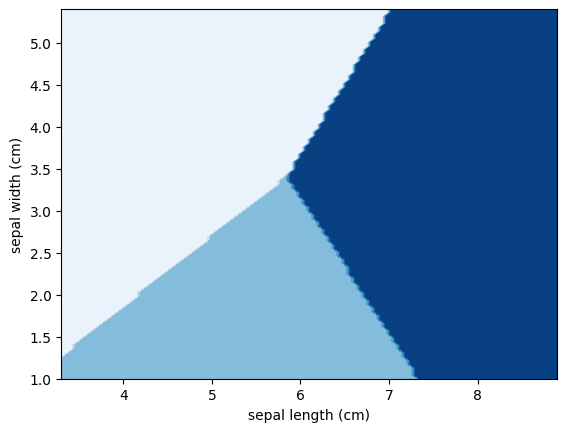

<Figure size 800x600 with 0 Axes>

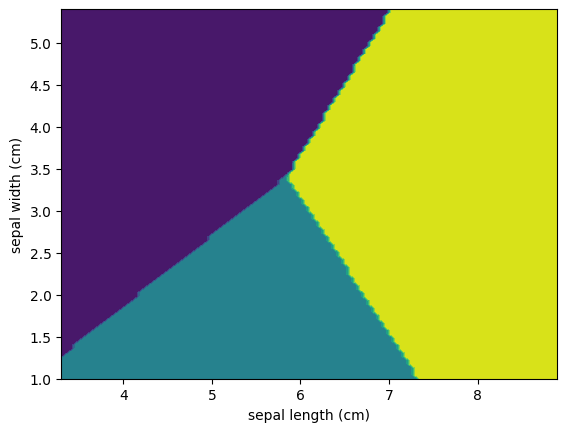

In [32]:
# Code goes here
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

class_names = ['Setosa', 'Versicolor', 'Virginica']
display = DecisionBoundaryDisplay.from_estimator(lr, X_train, cmap=plt.cm.Blues, class_names=class_names)
plt.figure(figsize=(8, 6))
display.plot()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolors='k', s=20, label='Training Points')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolors='k', s=80, marker='s', label='Test Points')

plt.title('Decision Boundaries with Training and Test Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### 4. Compute the accuracy of the classifier

Compute the accuracy of the classifier on the training set and on the test set. You can use the estimator method `score` to do so
(by default, this method returns the accuracy of the classifier).

Then, compute the accuracy for specific classes of the dataset (e.g., only class 0, 1, or 2).

In [34]:
# Code goes here

train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
classes_to_evaluate = [0, 1, 2]
for class_label in classes_to_evaluate:
    class_indices = (y_test == class_label)
    X_class = X_test[class_indices]
    y_class = y_test[class_indices]

class_accuracy = lr.score(X_class, y_class)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)
print(f"Accuracy for class {class_label}: {class_accuracy}")

Training set accuracy: 0.825
Test set accuracy: 0.7666666666666667
Accuracy for class 2: 0.625


### 5. Final checks

* Change the value of the regularization parameter `C` and see how the decision boundaries change. You
can also try to change the value of the `penalty` parameter and see how the decision boundaries change.
* Try to repeat the exercise but with different pairs of features (e.g., petal length and width).
* Repeat the exercise with a K-Nearest Neighbors classifier. 